In [28]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#This zip objects packs each pair of lats and lngs having the same index in their respective array into a tuple

In [30]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [31]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [32]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

604

## Retrieve City Weather Data

In [33]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [34]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | kysyl-syr
Processing Record 3 of Set 1 | cap malheureux
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | daru
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | sabaudia
Processing Record 9 of Set 1 | vostok
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | akdepe
Processing Record 13 of Set 1 | noumea
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | bilma
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | chapais
Processing Record

City not found. Skipping...
Processing Record 39 of Set 4 | santa maria
Processing Record 40 of Set 4 | road town
Processing Record 41 of Set 4 | medea
Processing Record 42 of Set 4 | phetchabun
Processing Record 43 of Set 4 | vao
Processing Record 44 of Set 4 | olovyannaya
Processing Record 45 of Set 4 | jumla
Processing Record 46 of Set 4 | caravelas
Processing Record 47 of Set 4 | mayor pablo lagerenza
Processing Record 48 of Set 4 | yenotayevka
Processing Record 49 of Set 4 | temiscaming
Processing Record 50 of Set 4 | saint george
Processing Record 1 of Set 5 | gurkovo
Processing Record 2 of Set 5 | taoudenni
Processing Record 3 of Set 5 | stepnyak
Processing Record 4 of Set 5 | jabinyanah
Processing Record 5 of Set 5 | sohag
Processing Record 6 of Set 5 | kodino
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | ancud
Processing Record 9 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 5 | talnakh
Processing Record 11 of Set 5 | ugoof

Processing Record 29 of Set 8 | port blair
Processing Record 30 of Set 8 | villa guerrero
Processing Record 31 of Set 8 | la peca
Processing Record 32 of Set 8 | erenhot
Processing Record 33 of Set 8 | komsomolskiy
Processing Record 34 of Set 8 | tessalit
Processing Record 35 of Set 8 | gizo
Processing Record 36 of Set 8 | baruun-urt
Processing Record 37 of Set 8 | nacogdoches
Processing Record 38 of Set 8 | westpunt
City not found. Skipping...
Processing Record 39 of Set 8 | umea
Processing Record 40 of Set 8 | the pas
Processing Record 41 of Set 8 | jizan
Processing Record 42 of Set 8 | alice springs
Processing Record 43 of Set 8 | san quintin
Processing Record 44 of Set 8 | bababe
City not found. Skipping...
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | hobyo
Processing Record 47 of Set 8 | neustrelitz
Processing Record 48 of Set 8 | victoria
Processing Record 49 of Set 8 | gaoual
Processing Record 50 of Set 8 | guanay
Processing Record 1 of Set 9 | kane

Processing Record 15 of Set 12 | kollam
Processing Record 16 of Set 12 | camacha
Processing Record 17 of Set 12 | roald
Processing Record 18 of Set 12 | yaan
Processing Record 19 of Set 12 | biak
Processing Record 20 of Set 12 | fairbanks
Processing Record 21 of Set 12 | korla
Processing Record 22 of Set 12 | nagua
Processing Record 23 of Set 12 | shimoda
Processing Record 24 of Set 12 | itoman
Processing Record 25 of Set 12 | ostrovnoy
Processing Record 26 of Set 12 | rockport
Processing Record 27 of Set 12 | posse
Processing Record 28 of Set 12 | codrington
Processing Record 29 of Set 12 | ambovombe
Processing Record 30 of Set 12 | tabuk
Processing Record 31 of Set 12 | mao
Processing Record 32 of Set 12 | puerto rondon
Processing Record 33 of Set 12 | mackay
Processing Record 34 of Set 12 | kranidion
City not found. Skipping...
Processing Record 35 of Set 12 | yulara
Processing Record 36 of Set 12 | skjervoy
Processing Record 37 of Set 12 | acapulco
Processing Record 38 of Set 12 | 

In [35]:
len(city_data)

559

In [36]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kysyl-Syr,63.90,122.76,-5.98,90,93,6.51,RU,2020-11-20 04:13:30
1,Cap Malheureux,-19.98,57.61,77.00,70,58,1.99,MU,2020-11-20 04:13:31
2,Bredasdorp,-34.53,20.04,57.20,93,0,5.82,ZA,2020-11-20 04:13:31
3,Daru,-9.08,143.21,83.89,74,95,17.22,PG,2020-11-20 04:13:31
4,Tuktoyaktuk,69.45,-133.04,-0.40,77,5,6.93,CA,2020-11-20 04:13:31
5,Chuy,-33.70,-53.46,57.43,78,10,3.31,UY,2020-11-20 04:13:31
6,Sabaudia,41.30,13.03,57.00,88,89,4.00,IT,2020-11-20 04:13:32
7,Vostok,46.49,135.88,26.56,96,100,4.07,RU,2020-11-20 04:13:32
8,Salalah,17.02,54.09,73.40,53,0,3.36,OM,2020-11-20 04:13:32
9,Akdepe,42.06,59.38,12.20,66,0,6.93,TM,2020-11-20 04:13:33


In [37]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kysyl-Syr,RU,2020-11-20 04:13:30,63.90,122.76,-5.98,90,93,6.51
1,Cap Malheureux,MU,2020-11-20 04:13:31,-19.98,57.61,77.00,70,58,1.99
2,Bredasdorp,ZA,2020-11-20 04:13:31,-34.53,20.04,57.20,93,0,5.82
3,Daru,PG,2020-11-20 04:13:31,-9.08,143.21,83.89,74,95,17.22
4,Tuktoyaktuk,CA,2020-11-20 04:13:31,69.45,-133.04,-0.40,77,5,6.93
5,Chuy,UY,2020-11-20 04:13:31,-33.70,-53.46,57.43,78,10,3.31
6,Sabaudia,IT,2020-11-20 04:13:32,41.30,13.03,57.00,88,89,4.00
7,Vostok,RU,2020-11-20 04:13:32,46.49,135.88,26.56,96,100,4.07
8,Salalah,OM,2020-11-20 04:13:32,17.02,54.09,73.40,53,0,3.36
9,Akdepe,TM,2020-11-20 04:13:33,42.06,59.38,12.20,66,0,6.93


In [38]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [39]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

## Plotting Weather Data

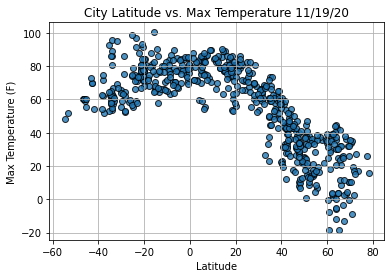

In [40]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

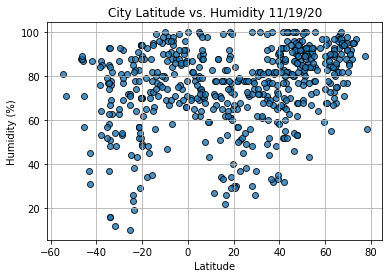

In [41]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

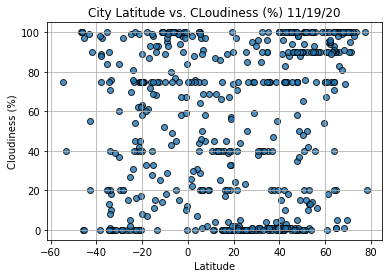

In [42]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. CLoudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

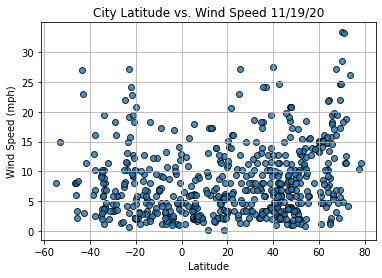

In [43]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig4.png')

#Show plot
plt.show()